# Exploring the Taste of NYC Neighborhoods
> ## IBM Applied Data Science Capstone Project

<a name="tableofcontents"></a>

## Table of Contents
1. [Introduction](#introduction)
2. [Data](#data)
3. [Methodology](#methodology)
4. [Analysis & Machine Learning](#analysis)
5. [Results](#results)

<a name="introduction"></a>

## 1. Introduction

New York City is the most populous city in the United States, home to the headquarters of the United Nations and an important center for international diplomacy and many more peoples planning to migrate in it. It just might be the most diverse city on the planet, as it is home to over 8.6 million people and over 800 languages.

Undoubtedly, **Food Diversity** is an important part of an ethnically diverse metropolis. The idea of this project is to get idea of neighborhoods for finding best cuisines by categorically segmenting the neighborhoods of New York City into major clusters and examining. A desirable intention is to examine the neighborhood cluster's food habits and taste that is used for finding best place for migration. Further examination might reveal if food has any relationship with the diversity of a neighborhood.

This project will help to understand the diversity of a neighborhood by leveraging venue data from Foursquare’s ‘Places API’ and ‘k-means clustering’ machine learning algorithm. Exploratory Data Analysis (EDA) will help to discover further about the culture and diversity of the neighborhood that will helps the peoples who are planning too migrate in NY.   
**Stakeholders** would be the one who are interested to use this quantifiable analysis to understand the distribution of different cultures and cuisines over "the most diverse city on the planet - NYC". Also, this project can be utilized by a new food vendor who is willing to open his or her restaurant. Or by a government authority to examine and study their city's culture diversity better.

<a name="data"></a>[Scroll Back to Table of Contents](#tableofcontents)

## 2. Data

To examine the above said, following data sources will be used:

1.  **New York City Dataset**
    *  Link: <https://geo.nyu.edu/catalog/nyu_2451_34572>
    *  Description: This New York City Neighborhood Names point file was created as a guide to New York City’s neighborhoods that appear on the web resource, “New York: A City of Neighborhoods.” Best estimates of label centroids were established at a 1:1,000 scale, but are ideally viewed at a 1:50,000 scale. This dataset will provide the addresses of neighborhood of NYC in json format. An extract of the json is as follows:
    ```
	{'type': 'Feature',
	'id': 'nyu_2451_34572.306',
	'geometry': {'type': 'Point',
	'coordinates': [-74.08173992211962, 40.61731079252983]},
	'geometry_name': 'geom',
	'properties': {'name': 'Fox Hills',
	'stacked': 2,
	'annoline1': 'Fox',
	'annoline2': 'Hills',
	'annoline3': None,
	'annoangle': 0.0,
	'borough': 'Staten Island',
	'bbox': [-74.08173992211962,
	40.61731079252983,
	-74.08173992211962,
	40.61731079252983]}}
    ```

2.  **Foursquare API:**
    *  Link: <https://developer.foursquare.com/docs>
    *  Description: Foursquare API, a location data provider, will be used to make RESTful API calls to retrieve data about venues in different neighborhoods. This is the link to [Foursquare Venue Category Hierarchy](https://developer.foursquare.com/docs/resources/categories). Venues retrieved from all the neighborhoods are categorized broadly into "Arts & Entertainment", "College & University", "Event", "Food", "Nightlife Spot", "Outdoors & Recreation", etc. An extract of an API call is as follows:
    ```
	'categories': [{'id': '4bf58dd8d48988d110941735',
	   'name': 'Italian Restaurant',
	   'pluralName': 'Italian Restaurants',
	   'shortName': 'Italian',
	   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
	   'suffix': '.png'},
	   'primary': True}],
	'verified': False,
	'stats': {'tipCount': 17},
	'url': 'http://eccorestaurantny.com',
	'price': {'tier': 4, 'message': 'Very Expensive', 'currency'
    ```

<a name="methodology">[Scroll Back to Table of Contents](#tableofcontents)

## 2. Methodology

Download all the dependencies.

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from pprint import pprint # data pretty printer

import requests # library to handle requests
from bs4 import BeautifulSoup  # library to handle web scraping

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors # Matplotlib and associated plotting modules

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from collections import Counter # count occurrences 

from sklearn.cluster import KMeans # import k-means from clustering stage

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.0.0               |             py_0         606 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be 

### Download and Explore New York City Dataset

In order to segment the neighborhoods of New York City, a dataset is required that contains the 5 boroughs and the neighborhoods, that exist in each borough, with respective latitude and longitude coordinates.

This dataset exists for free on the web. Here is the link 
* To the dataset: https://geo.nyu.edu/catalog/nyu_2451_34572, and
* To its downloadable json format file: https://cocl.us/new_york_dataset/newyork_data.json

In [14]:
!conda install -c conda-forge python-wget
import wget
import os

if os.path.exists('newyork_data.json'):
    os.remove('newyork_data.json')

wget.download('https://cocl.us/new_york_dataset/newyork_data.json')

print('\nData downloaded!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - python-wget


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    python-wget-3.2            |             py_0          13 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         161 KB

The following NEW packages will be INSTALLED:

    python-wget:     3.2-py_0          conda-forge

The following packages will be UPDATED:

    ca-certificates: 2019.11.27-0      anaconda    --> 2019.11.28-hecc5488_0 conda-forge
    certifi:         2019.11.28-py36_0 anaconda    --> 2019.11.28-py36_0     conda-forge

The following packages will be DOWNGRADED:

    openssl:         1.1.1-h7b6447c_0  anaconda    --> 1.1.1d-h

In [15]:
# open & load downloaded file, print its type
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
type(newyork_data)

dict

In [16]:
print ("newyork_data key and value's length are: ") 
for key, value in newyork_data.items(): 
    print (key, len(str(value)))

newyork_data key and value's length are: 
type 17
totalFeatures 3
features 124743
crs 70
bbox 74


All the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [17]:
neighborhoods_data = newyork_data['features']
pprint(neighborhoods_data[305])

{'geometry': {'coordinates': [-74.08173992211962, 40.61731079252983],
              'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.306',
 'properties': {'annoangle': 0.0,
                'annoline1': 'Fox',
                'annoline2': 'Hills',
                'annoline3': None,
                'bbox': [-74.08173992211962,
                         40.61731079252983,
                         -74.08173992211962,
                         40.61731079252983],
                'borough': 'Staten Island',
                'name': 'Fox Hills',
                'stacked': 2},
 'type': 'Feature'}


#### Tranform the data into a *pandas* dataframe

In [18]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

Empty DataFrame
Columns: [Borough, Neighborhood, Latitude, Longitude]
Index: []

Then let's loop through the data and fill the dataframe one row at a time.

In [19]:
for data in neighborhoods_data:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [20]:
neighborhoods.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

In [21]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In [22]:
address = 'New York City, NY'
location = None

# define an instance of the geocoder -> ny_explorer
while location == None:
    try:
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
    except:
        pass
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [24]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

#### Define Foursquare Credentials and Version
Utilizing the Foursquare API to explore the neighborhoods and segment them.

In [25]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20191226' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


**Fetch Foursquare Venue Category Hierarchy**

In [13]:
url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION)
category_results = requests.get(url).json()

Let's see the structure or the keys of the returned request.

In [14]:
for key, value in category_results['response']['categories'][0].items():
    print(key, len(str(value)))

id 24
name 20
pluralName 20
shortName 20
icon 98
categories 15910


In [15]:
category_list = category_results['response']['categories']

In [16]:
len(category_list)

10

In [17]:
for data in category_list:
    print(data['id'], data['name'])

4d4b7104d754a06370d81259 Arts & Entertainment
4d4b7105d754a06372d81259 College & University
4d4b7105d754a06373d81259 Event
4d4b7105d754a06374d81259 Food
4d4b7105d754a06376d81259 Nightlife Spot
4d4b7105d754a06377d81259 Outdoors & Recreation
4d4b7105d754a06375d81259 Professional & Other Places
4e67e38e036454776db1fb3a Residence
4d4b7105d754a06378d81259 Shop & Service
4d4b7105d754a06379d81259 Travel & Transport


**_Food_ & It's Sub-Categories**

Let's create a function to return a dictionary with Ids' & Names of _Food_ & It's Sub-Categories.

In [18]:
# function to flatten a 'parent_id' category, returns all categories if checkParentID = False
def flatten_Hierarchy(category_list, checkParentID, category_dict, parent_id = ''):
    for data in category_list:
        
        if checkParentID == True and data['id'] == parent_id:
            category_dict[data['id']] = data['name']
            flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
        
        elif checkParentID == False:
            category_dict[data['id']] = data['name']
            if len(data['categories']) != 0:
                flatten_Hierarchy(category_list = data['categories'], checkParentID = False, category_dict = category_dict)
    
    return category_dict

In [19]:
# this function takes the parent ID and returns 'name' and 'id' of all the sub-categories
category_dict = flatten_Hierarchy(category_list, checkParentID=True, category_dict = {}, parent_id = '4d4b7105d754a06374d81259')

Now, we have all the categories in _Food_ with their id's.

#### Explore the first neighborhood to understand the results of GET Request

Get the neighborhood's name.

In [20]:
neighborhoods.loc[0, 'Neighborhood']

'Wakefield'

Get the neighborhood's latitude and longitude values.

In [21]:
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


#### Now, let's get the _Food_ that is in Wakefield within a radius of 500 meters.

First, let's create the GET request URL to search for Venue with requested _Category ID_

In [22]:
LIMIT = 1 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
categoryId = '4d4b7105d754a06374d81259' # category ID for "Food"

# create URL

url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius,
    categoryId,
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/search?&client_id=XOKJYQNJOBDGS1WJQLVWK0KY2MX2LSBS2RQHYZ1IERYGZQM2&client_secret=JMKC15GZW4SFCQV32GOIZTXEJD4IHUGNM5L4U2SEXLBYPLHH&v=20180605&ll=40.89470517661,-73.84720052054902&radius=500&categoryId=4d4b7105d754a06374d81259&limit=1'

Send the GET request and examine the resutls

In [23]:
results = requests.get(url).json()

In [24]:
results['response']['venues']

[{'id': '4c783cef3badb1f7e4244b54',
  'name': 'Carvel Ice Cream',
  'location': {'address': '1006 E 233rd St',
   'lat': 40.890486685759605,
   'lng': -73.84856772568665,
   'labeledLatLngs': [{'label': 'display',
     'lat': 40.890486685759605,
     'lng': -73.84856772568665}],
   'distance': 483,
   'postalCode': '10466',
   'cc': 'US',
   'city': 'Bronx',
   'state': 'NY',
   'country': 'United States',
   'formattedAddress': ['1006 E 233rd St',
    'Bronx, NY 10466',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d1c9941735',
    'name': 'Ice Cream Shop',
    'pluralName': 'Ice Cream Shops',
    'shortName': 'Ice Cream',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/icecream_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1571641530',
  'hasPerk': False}]

The category name of the venue **'Carvel Ice Cream'** is **'Food'**.

As, our aim is to segment the neighborhoods of NYC with respect to the _Food_ in its vicinity. We need to proceed further to fetch this data from all the 306 neighborhoods' venues.

#### Let's create a function to repeat the following process to all the neighborhoods in NYC:
* Loop through neighborhoods
    * Create the API request URL with radius=500, LIMIT=100
    * Make the GET request
    * For each neighborhood, return only relevant information for each nearby venue
    * Append all nearby venues to a list
* Unfold the list & append it to dataframe being returned

The _categoryId_ parameter in the API request URL can be a comma seperated string. So, lets create a comma seperated string from _category_\__dict_.

In [25]:
categoryId_list = []
for key, value in category_dict.items():
    categoryId_list.append(key)
categoryId = ','.join(categoryId_list)

The above process turns out to be redundant because if a top-level category is specified in the GET Request, all sub-categories will also match the query. But it is an interesting way to retrieve all the sub-categories ID with name.

In [26]:
def getNearbyFood(names, latitudes, longitudes, radius=1000, LIMIT=500):
    not_found = 0
    print('***Start ', end='')
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(' .', end='')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
            "4d4b7105d754a06374d81259", # "Food" category id
            LIMIT)
            
        try:
            # make the GET request
            results = requests.get(url).json()['response']['venues']
            
            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['name'], 
                v['location']['lat'], 
                v['location']['lng'],  
                v['categories'][0]['name']) for v in results])
        except:
            not_found += 1


    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("\nDone*** with {} venues with incompelete information.".format(not_found))
    return(nearby_venues)

**Let's use pickle library to serialize the information retrieved from GET requests. This step will counter any redundant requests to the Foursquare API.**

In [27]:
import pickle # to serialize and deserialize a Python object structure
try:
    with open('nyc_food_venues.pkl', 'rb') as f:
        nyc_venues = pickle.load(f)
    print("---Dataframe Existed and Deserialized---")
except:
    nyc_venues = getNearbyFood(names=neighborhoods['Neighborhood'],
                                        latitudes=neighborhoods['Latitude'],
                                        longitudes=neighborhoods['Longitude']
                                       )
    with open('nyc_food_venues.pkl', 'wb') as f:
        pickle.dump(nyc_venues, f)
    print("---Dataframe Created and Serialized---")

---Dataframe Existed and Deserialized---


<a name="analysis"> [Scroll Back to Table of Contents](#tableofcontents)

## 3. Analysis & Machine Learning

#### Let's check the size of the resulting dataframe

In [28]:
print(nyc_venues.shape)
nyc_venues.head()

(14047, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Wakefield              40.894705              -73.847201   
1    Wakefield              40.894705              -73.847201   
2    Wakefield              40.894705              -73.847201   
3    Wakefield              40.894705              -73.847201   
4    Wakefield              40.894705              -73.847201   

              Venue  Venue Latitude  Venue Longitude        Venue Category  
0  Lollipops Gelato       40.894123       -73.845892          Dessert Shop  
1       Pitman Deli       40.894149       -73.845748                  Food  
2  Carvel Ice Cream       40.890487       -73.848568        Ice Cream Shop  
3       Burger King       40.895532       -73.856436  Fast Food Restaurant  
4           Dunkin'       40.890459       -73.849089            Donut Shop

#### Let's find out how many unique categories can be curated from all the returned venues

In [29]:
print('There are {} uniques categories.'.format(len(nyc_venues['Venue Category'].unique())))
nyc_venues.groupby('Venue Category')['Venue Category'].count().sort_values(ascending=False)

There are 194 uniques categories.


Venue Category
Deli / Bodega                               1136
Pizza Place                                 1078
Coffee Shop                                  919
Donut Shop                                   710
Fast Food Restaurant                         664
Chinese Restaurant                           619
Italian Restaurant                           544
Bakery                                       544
American Restaurant                          428
Café                                         401
Caribbean Restaurant                         359
Bagel Shop                                   357
Mexican Restaurant                           352
Sandwich Place                               332
Diner                                        313
Ice Cream Shop                               256
Fried Chicken Joint                          254
Restaurant                                   224
Food                                         204
Burger Joint                                 204
Seafo

As we are interested in exploring the diversity of the neighborhood. Let's remove the generalized categories, like Coffee Shop, Cafe, etc.

In [30]:
# list all the categories
unique_categories = nyc_venues['Venue Category'].unique().tolist()
print(', '.join(str(x) for x in unique_categories))

Dessert Shop, Food, Ice Cream Shop, Fast Food Restaurant, Donut Shop, Caribbean Restaurant, Bakery, Sandwich Place, Italian Restaurant, Comfort Food Restaurant, Fried Chicken Joint, Deli / Bodega, Food Truck, Chinese Restaurant, Pizza Place, Southern / Soul Food Restaurant, Halal Restaurant, Asian Restaurant, Bagel Shop, American Restaurant, Burger Joint, Restaurant, Mexican Restaurant, Seafood Restaurant, Frozen Yogurt Shop, Spanish Restaurant, Steakhouse, BBQ Joint, Coffee Shop, Dumpling Restaurant, Diner, Wings Joint, Café, Juice Bar, Breakfast Spot, Grocery Store, Latin American Restaurant, Tapas Restaurant, Japanese Restaurant, Bar, Sushi Restaurant, Greek Restaurant, Indian Restaurant, Thai Restaurant, Korean Restaurant, New American Restaurant, Vegetarian / Vegan Restaurant, Cupcake Shop, Cuban Restaurant, Pub, Fish & Chips Shop, Empanada Restaurant, Salvadoran Restaurant, Cafeteria, Other Nightlife, Arcade, Hot Dog Joint, Food Court, Middle Eastern Restaurant, Health Food Store

In [31]:
# manually create a list of generalized categories
general_categories = ['Dessert Shop','Food','Ice Cream Shop','Donut Shop','Bakery','Sandwich Place','Comfort Food Restaurant',
                    'Deli / Bodega','Food Truck','Bagel Shop','Burger Joint','Restaurant','Frozen Yogurt Shop','Coffee Shop',
                    'Diner','Wings Joint','Café','Juice Bar','Breakfast Spot','Grocery Store','Bar','Cupcake Shop',
                    'Pub','Fish & Chips Shop','Cafeteria','Other Nightlife','Arcade','Hot Dog Joint','Food Court',
                    'Health Food Store','Convenience Store','Food & Drink Shop','Cocktail Bar','Cheese Shop',
                    'Snack Place','Sports Bar','Lounge','Theme Restaurant','Buffet','Bubble Tea Shop','Building',
                    'Irish Pub','College Cafeteria','Tea Room','Supermarket','Hotpot Restaurant','Gastropub','Beer Garden',
                    'Fish Market','Beer Bar','Clothing Store','Music Venue','Bistro','Salad Place','Wine Bar','Gourmet Shop',
                    'Indie Movie Theater','Art Gallery','Gift Shop','Pie Shop','Fruit & Vegetable Store',
                    'Street Food Gathering','Dive Bar','Factory','Farmers Market','Mac & Cheese Joint','Creperie',
                    'Candy Store','Event Space','Skating Rink','Miscellaneous Shop','Gas Station','Organic Grocery',
                    'Pastry Shop','Club House','Flea Market','Hotel','Furniture / Home Store','Bookstore','Pet Café',
                    'Gym / Fitness Center','Flower Shop','Financial or Legal Service','Hotel Bar','Hookah Bar','Poke Place',
                    'Market','Gluten-free Restaurant','Smoothie Shop','Butcher','Food Stand','Beach Bar','Beach',
                    'Soup Place','Rock Club','Residential Building (Apartment / Condo)','Laundry Service',
                    'Government Building','Bowling Alley','Nightclub','Park','Moving Target']

In [32]:
# fetch all the required food categories
food_categories =  list(set(unique_categories) - set(general_categories))
print(', '.join(str(x) for x in food_categories))

Szechuan Restaurant, South American Restaurant, American Restaurant, Middle Eastern Restaurant, New American Restaurant, Burrito Place, Arepa Restaurant, Pakistani Restaurant, Tibetan Restaurant, Taco Place, Italian Restaurant, Thai Restaurant, Filipino Restaurant, French Restaurant, Vegetarian / Vegan Restaurant, Ramen Restaurant, Tex-Mex Restaurant, Cajun / Creole Restaurant, Cuban Restaurant, Peruvian Restaurant, Latin American Restaurant, South Indian Restaurant, Shabu-Shabu Restaurant, Indian Chinese Restaurant, North Indian Restaurant, Salvadoran Restaurant, Kosher Restaurant, Argentinian Restaurant, Taiwanese Restaurant, Udon Restaurant, Jewish Restaurant, Venezuelan Restaurant, Caribbean Restaurant, Turkish Restaurant, Dim Sum Restaurant, Cantonese Restaurant, Persian Restaurant, Hawaiian Restaurant, Japanese Restaurant, Moroccan Restaurant, Spanish Restaurant, Paella Restaurant, Mexican Restaurant, BBQ Joint, Falafel Restaurant, Eastern European Restaurant, Kebab Restaurant, S

Let's remove all the generalized categories, like Coffee Shop, Cafe, etc.

In [33]:
nyc_venues = nyc_venues[nyc_venues['Venue Category'].isin(food_categories)].reset_index()
nyc_venues.head(5)

index Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0      3    Wakefield              40.894705              -73.847201   
1      5    Wakefield              40.894705              -73.847201   
2      9    Wakefield              40.894705              -73.847201   
3     10    Wakefield              40.894705              -73.847201   
4     11    Wakefield              40.894705              -73.847201   

                                     Venue  Venue Latitude  Venue Longitude  \
0                              Burger King       40.895532       -73.856436   
1  Cooler Runnings Jamaican Restaurant Inc       40.898276       -73.850381   
2                               McDonald's       40.902645       -73.849485   
3                       Ripe Kitchen & Bar       40.898152       -73.838875   
4                        Frank and Johnies       40.905019       -73.858392   

         Venue Category  
0  Fast Food Restaurant  
1  Caribbean Restaurant  
2  Fast Food Restaurant  
3  Caribbean Restaurant  
4    Italian Restaurant

In [34]:
print('There are {} unique FOOD categories.'.format(len(nyc_venues['Venue Category'].unique())))

There are 92 unique FOOD categories.


#### Let's find out how many unique venues can be curated from all the returned venues

In [35]:
print('There are {} uniques venues.'.format(len(nyc_venues['Venue'].unique())))

There are 3323 uniques venues.


### Analyze Each Neighborhood

In [36]:
# one hot encoding
nyc_onehot = pd.get_dummies(nyc_venues[['Venue Category']], prefix="", prefix_sep="")
nyc_onehot.head()

Afghan Restaurant  African Restaurant  American Restaurant  \
0                  0                   0                    0   
1                  0                   0                    0   
2                  0                   0                    0   
3                  0                   0                    0   
4                  0                   0                    0   

   Arepa Restaurant  Argentinian Restaurant  Asian Restaurant  \
0                 0                       0                 0   
1                 0                       0                 0   
2                 0                       0                 0   
3                 0                       0                 0   
4                 0                       0                 0   

   Australian Restaurant  Austrian Restaurant  BBQ Joint  \
0                      0                    0          0   
1                      0                    0          0   
2                      0                    0          0   
3                      0                    0          0   
4                      0                    0          0   

   Brazilian Restaurant  Burmese Restaurant  Burrito Place  \
0                     0                   0              0   
1                     0                   0              0   
2                     0                   0              0   
3                     0                   0              0   
4                     0                   0              0   

   Cajun / Creole Restaurant  Cantonese Restaurant  Caribbean Restaurant  \
0                          0                     0                     0   
1                          0                     0                     1   
2                          0                     0                     0   
3                          0                     0                     1   
4                          0                     0                     0   

   Caucasian Restaurant  Chinese Restaurant  Colombian Restaurant  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Cuban Restaurant  Dim Sum Restaurant  Dosa Place  Dumpling Restaurant  \
0                 0                   0           0                    0   
1                 0                   0           0                    0   
2                 0                   0           0                    0   
3                 0                   0           0                    0   
4                 0                   0           0                    0   

   Eastern European Restaurant  Empanada Restaurant  English Restaurant  \
0                            0                    0                   0   
1                            0                    0                   0   
2                            0                    0                   0   
3                            0                    0                   0   
4                            0                    0                   0   

   Ethiopian Restaurant  Falafel Restaurant  Fast Food Restaurant  \
0                     0                   0                     1   
1                     0                   0                     0   
2                     0                   0                     1   
3                     0                   0                     0   
4                     0                   0                     0   

   Filipino Restaurant  French Restaurant  Fried Chicken Joint  \
0                    0                  0                    0   
1                    0                  0                    0   
2                    0                  0                    0   
3                    0      

In [37]:
# add neighborhood column back to dataframe
nyc_onehot['Neighborhood'] = nyc_venues['Neighborhood'] 
nyc_onehot.head()

Afghan Restaurant  African Restaurant  American Restaurant  \
0                  0                   0                    0   
1                  0                   0                    0   
2                  0                   0                    0   
3                  0                   0                    0   
4                  0                   0                    0   

   Arepa Restaurant  Argentinian Restaurant  Asian Restaurant  \
0                 0                       0                 0   
1                 0                       0                 0   
2                 0                       0                 0   
3                 0                       0                 0   
4                 0                       0                 0   

   Australian Restaurant  Austrian Restaurant  BBQ Joint  \
0                      0                    0          0   
1                      0                    0          0   
2                      0                    0          0   
3                      0                    0          0   
4                      0                    0          0   

   Brazilian Restaurant  Burmese Restaurant  Burrito Place  \
0                     0                   0              0   
1                     0                   0              0   
2                     0                   0              0   
3                     0                   0              0   
4                     0                   0              0   

   Cajun / Creole Restaurant  Cantonese Restaurant  Caribbean Restaurant  \
0                          0                     0                     0   
1                          0                     0                     1   
2                          0                     0                     0   
3                          0                     0                     1   
4                          0                     0                     0   

   Caucasian Restaurant  Chinese Restaurant  Colombian Restaurant  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Cuban Restaurant  Dim Sum Restaurant  Dosa Place  Dumpling Restaurant  \
0                 0                   0           0                    0   
1                 0                   0           0                    0   
2                 0                   0           0                    0   
3                 0                   0           0                    0   
4                 0                   0           0                    0   

   Eastern European Restaurant  Empanada Restaurant  English Restaurant  \
0                            0                    0                   0   
1                            0                    0                   0   
2                            0                    0                   0   
3                            0                    0                   0   
4                            0                    0                   0   

   Ethiopian Restaurant  Falafel Restaurant  Fast Food Restaurant  \
0                     0                   0                     1   
1                     0                   0                     0   
2                     0                   0                     1   
3                     0                   0                     0   
4                     0                   0                     0   

   Filipino Restaurant  French Restaurant  Fried Chicken Joint  \
0                    0                  0                    0   
1                    0                  0                    0   
2                    0                  0                    0   
3                    0      

In [38]:
# move neighborhood column to the first column
Neighborhood = nyc_onehot['Neighborhood']

nyc_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
nyc_onehot.insert(0, 'Neighborhood', Neighborhood)

nyc_onehot.head()

Neighborhood  Afghan Restaurant  African Restaurant  American Restaurant  \
0    Wakefield                  0                   0                    0   
1    Wakefield                  0                   0                    0   
2    Wakefield                  0                   0                    0   
3    Wakefield                  0                   0                    0   
4    Wakefield                  0                   0                    0   

   Arepa Restaurant  Argentinian Restaurant  Asian Restaurant  \
0                 0                       0                 0   
1                 0                       0                 0   
2                 0                       0                 0   
3                 0                       0                 0   
4                 0                       0                 0   

   Australian Restaurant  Austrian Restaurant  BBQ Joint  \
0                      0                    0          0   
1                      0                    0          0   
2                      0                    0          0   
3                      0                    0          0   
4                      0                    0          0   

   Brazilian Restaurant  Burmese Restaurant  Burrito Place  \
0                     0                   0              0   
1                     0                   0              0   
2                     0                   0              0   
3                     0                   0              0   
4                     0                   0              0   

   Cajun / Creole Restaurant  Cantonese Restaurant  Caribbean Restaurant  \
0                          0                     0                     0   
1                          0                     0                     1   
2                          0                     0                     0   
3                          0                     0                     1   
4                          0                     0                     0   

   Caucasian Restaurant  Chinese Restaurant  Colombian Restaurant  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Cuban Restaurant  Dim Sum Restaurant  Dosa Place  Dumpling Restaurant  \
0                 0                   0           0                    0   
1                 0                   0           0                    0   
2                 0                   0           0                    0   
3                 0                   0           0                    0   
4                 0                   0           0                    0   

   Eastern European Restaurant  Empanada Restaurant  English Restaurant  \
0                            0                    0                   0   
1                            0                    0                   0   
2                            0                    0                   0   
3                            0                    0                   0   
4                            0                    0                   0   

   Ethiopian Restaurant  Falafel Restaurant  Fast Food Restaurant  \
0                     0                   0                     1   
1                     0                   0                     0   
2                     0                   0                     1   
3                     0                   0                     0   
4                     0                   0                     0   

   Filipino Restaurant  French Restaurant  Fried Chicken Joint  \
0                    0                  0                    0   
1                    0                  0                    0   
2              

And let's examine the new dataframe size.

In [39]:
nyc_onehot.shape

(6846, 93)

Let's count venues of each category in each neighborhood

In [40]:
venue_counts = nyc_onehot.groupby('Neighborhood').sum()
venue_counts.head(5)

Afghan Restaurant  African Restaurant  American Restaurant  \
Neighborhood                                                                
Allerton                       0                   0                    0   
Annadale                       0                   0                    3   
Arden Heights                  0                   0                    3   
Arlington                      0                   0                    2   
Arrochar                       0                   0                    0   

               Arepa Restaurant  Argentinian Restaurant  Asian Restaurant  \
Neighborhood                                                                
Allerton                      0                       0                 0   
Annadale                      0                       0                 0   
Arden Heights                 0                       0                 0   
Arlington                     0                       0                 1   
Arrochar                      0                       0                 0   

               Australian Restaurant  Austrian Restaurant  BBQ Joint  \
Neighborhood                                                           
Allerton                           0                    0          0   
Annadale                           0                    0          0   
Arden Heights                      0                    0          1   
Arlington                          0                    0          0   
Arrochar                           0                    0          0   

               Brazilian Restaurant  Burmese Restaurant  Burrito Place  \
Neighborhood                                                             
Allerton                          0                   0              0   
Annadale                          0                   0              0   
Arden Heights                     0                   0              0   
Arlington                         0                   0              0   
Arrochar                          0                   0              0   

               Cajun / Creole Restaurant  Cantonese Restaurant  \
Neighborhood                                                     
Allerton                               0                     0   
Annadale                               0                     0   
Arden Heights                          0                     0   
Arlington                              0                     0   
Arrochar                               0                     0   

               Caribbean Restaurant  Caucasian Restaurant  Chinese Restaurant  \
Neighborhood                                                                    
Allerton                          3                     0                   4   
Annadale                          0                     0                   1   
Arden Heights                     0                     0                   2   
Arlington                         1                     0                   1   
Arrochar                          0                     0                   2   

               Colombian Restaurant  Cuban Restaurant  Dim Sum Restaurant  \
Neighborhood                                                                
Allerton                          0                 0                   0   
Annadale                          0                 0                   0   
Arden Heights                     0                 0                   0   
Arlington                         0                 0                   0   
Arrochar                          0                 0                   0   

               Dosa Place  Dumpling Restaurant  Eastern European Restaurant  \
Neighborhood                                                                  
Allerton                0                    0                            0   
Annadale                0                    0                            0   
Arden Heights           

Let's find out the top 10 food categories in NYC

In [41]:
venue_counts_described = venue_counts.describe().transpose()

In [42]:
venue_top10 = venue_counts_described.sort_values('max', ascending=False)[0:10]
venue_top10

count      mean       std  min  25%  50%  75%   max
Korean Restaurant        302.0  0.291391  1.828491  0.0  0.0  0.0  0.0  29.0
Chinese Restaurant       302.0  2.049669  2.083199  0.0  1.0  2.0  3.0  17.0
Caribbean Restaurant     302.0  1.188742  2.785965  0.0  0.0  0.0  1.0  16.0
Indian Restaurant        302.0  0.324503  1.123885  0.0  0.0  0.0  0.0  15.0
Fast Food Restaurant     302.0  2.198675  2.054150  0.0  1.0  2.0  3.0  11.0
Italian Restaurant       302.0  1.801325  1.983386  0.0  0.0  1.0  3.0  11.0
Pizza Place              302.0  3.569536  2.190314  0.0  2.0  3.0  5.0  10.0
Seafood Restaurant       302.0  0.513245  0.849950  0.0  0.0  0.0  1.0   7.0
New American Restaurant  302.0  0.357616  0.745702  0.0  0.0  0.0  0.0   6.0
Thai Restaurant          302.0  0.311258  0.726210  0.0  0.0  0.0  0.0   6.0

In [43]:
venue_top10_list = venue_top10.index.values.tolist()

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes =plt.subplots(5, 2, figsize=(20,20), sharex=True)
axes = axes.flatten()

for ax, category in zip(axes, venue_top10_list):
    data = venue_counts[[category]].sort_values([category], ascending=False)[0:10]
    pal = sns.color_palette("Blues", len(data))
    sns.barplot(x=category, y=data.index, data=data, ax=ax, palette=np.array(pal[::-1]))

plt.tight_layout()
plt.show();

<Figure size 2000x2000 with 10 Axes>

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [45]:
nyc_grouped = nyc_onehot.groupby('Neighborhood').mean().reset_index()
nyc_grouped.head()

Neighborhood  Afghan Restaurant  African Restaurant  American Restaurant  \
0       Allerton                0.0                 0.0             0.000000   
1       Annadale                0.0                 0.0             0.176471   
2  Arden Heights                0.0                 0.0             0.176471   
3      Arlington                0.0                 0.0             0.105263   
4       Arrochar                0.0                 0.0             0.000000   

   Arepa Restaurant  Argentinian Restaurant  Asian Restaurant  \
0               0.0                     0.0          0.000000   
1               0.0                     0.0          0.000000   
2               0.0                     0.0          0.000000   
3               0.0                     0.0          0.052632   
4               0.0                     0.0          0.000000   

   Australian Restaurant  Austrian Restaurant  BBQ Joint  \
0                    0.0                  0.0   0.000000   
1                    0.0                  0.0   0.000000   
2                    0.0                  0.0   0.058824   
3                    0.0                  0.0   0.000000   
4                    0.0                  0.0   0.000000   

   Brazilian Restaurant  Burmese Restaurant  Burrito Place  \
0                   0.0                 0.0            0.0   
1                   0.0                 0.0            0.0   
2                   0.0                 0.0            0.0   
3                   0.0                 0.0            0.0   
4                   0.0                 0.0            0.0   

   Cajun / Creole Restaurant  Cantonese Restaurant  Caribbean Restaurant  \
0                        0.0                   0.0              0.120000   
1                        0.0                   0.0              0.000000   
2                        0.0                   0.0              0.000000   
3                        0.0                   0.0              0.052632   
4                        0.0                   0.0              0.000000   

   Caucasian Restaurant  Chinese Restaurant  Colombian Restaurant  \
0                   0.0            0.160000                   0.0   
1                   0.0            0.058824                   0.0   
2                   0.0            0.117647                   0.0   
3                   0.0            0.052632                   0.0   
4                   0.0            0.111111                   0.0   

   Cuban Restaurant  Dim Sum Restaurant  Dosa Place  Dumpling Restaurant  \
0               0.0                 0.0         0.0                  0.0   
1               0.0                 0.0         0.0                  0.0   
2               0.0                 0.0         0.0                  0.0   
3               0.0                 0.0         0.0                  0.0   
4               0.0                 0.0         0.0                  0.0   

   Eastern European Restaurant  Empanada Restaurant  English Restaurant  \
0                          0.0                  0.0                 0.0   
1                          0.0                  0.0                 0.0   
2                          0.0                  0.0                 0.0   
3                          0.0                  0.0                 0.0   
4                          0.0                  0.0                 0.0   

   Ethiopian Restaurant  Falafel Restaurant  Fast Food Restaurant  \
0                   0.0                 0.0              0.120000   
1                   0.0                 0.0              0.000000   
2                   0.0                 0.0              0.000000   
3                   0.0                 0.0              0.157895   
4                   0.0                 0.0              0.000000   

   Filipino Restaurant  French Restaurant  Fried Chicken Joint  \
0                  0.0                0.0             0.160000   
1                  0.0                0.0             0.000000   
2    

#### Let's confirm the new size

In [46]:
nyc_grouped.shape

(302, 93)

#### Let's write a function to sort the venues in descending order.

In [47]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 5 venues for each neighborhood.

In [48]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))    

In [49]:
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = nyc_grouped['Neighborhood']

In [50]:
for ind in np.arange(nyc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(nyc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0       Allerton    Mexican Restaurant   Fried Chicken Joint   
1       Annadale           Pizza Place   American Restaurant   
2  Arden Heights           Pizza Place   American Restaurant   
3      Arlington           Pizza Place  Fast Food Restaurant   
4       Arrochar    Italian Restaurant           Pizza Place   

  3rd Most Common Venue      4th Most Common Venue 5th Most Common Venue  
0           Pizza Place         Chinese Restaurant  Fast Food Restaurant  
1      Sushi Restaurant         Italian Restaurant   Japanese Restaurant  
2    Italian Restaurant         Mexican Restaurant    Chinese Restaurant  
3   American Restaurant        Peruvian Restaurant    Spanish Restaurant  
4            Steakhouse  Middle Eastern Restaurant    Chinese Restaurant

### Cluster Neighborhoods

Run *k*-means to count Neighborhoods for each cluster label for variable cluster size

In [51]:
nyc_grouped_clustering = nyc_grouped.drop('Neighborhood', 1)

#### Determine the optimal number of clusters for k-means clustering

**The Elbow Method** - calculate the sum of squared distances of samples to their closest cluster center for different values of k. The value of k after which there is no siginificant decrease in sum of squared distances is choosen.

In [52]:
sum_of_squared_distances = []
K = range(1,50)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(nyc_grouped_clustering)
    sum_of_squared_distances.append(kmeans.inertia_)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

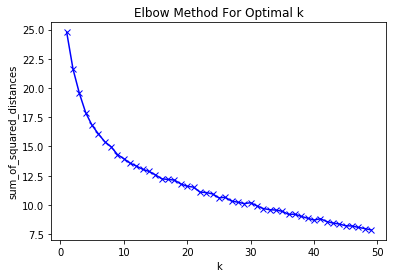

In [53]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k');

Elbow method does not seem to help us to determine the optimal number of clusters. Let's use another method.

**The Silhouette Method** - The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation). Source: Wikipedia

In [54]:
from sklearn.metrics import silhouette_score

sil = []
K_sil = range(2,50)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(nyc_grouped_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(nyc_grouped_clustering, labels, metric = 'euclidean'))

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

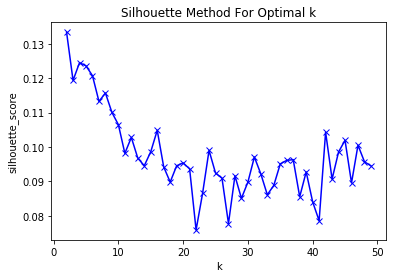

In [55]:
plt.plot(K_sil, sil, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

There is a peak at k = 2, k = 4 and k = 8. Two and four clusters will give a very broad classification of the venues.
#### Let's set number of clusters = 8

In [56]:
# set number of clusters
kclusters = 8

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters=kclusters, n_init=50).fit(nyc_grouped_clustering)

print(Counter(kmeans.labels_))

Counter({3: 87, 4: 52, 6: 50, 2: 45, 1: 31, 0: 21, 7: 15, 5: 1})


Let's create a new dataframe that includes the cluster as well as the top 5 venues for each neighborhood.

In [57]:
# add clustering labels
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [58]:
neighborhoods_venues_sorted.head(5)

Cluster Labels   Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0               6       Allerton    Mexican Restaurant   Fried Chicken Joint   
1               4       Annadale           Pizza Place   American Restaurant   
2               4  Arden Heights           Pizza Place   American Restaurant   
3               6      Arlington           Pizza Place  Fast Food Restaurant   
4               2       Arrochar    Italian Restaurant           Pizza Place   

  3rd Most Common Venue      4th Most Common Venue 5th Most Common Venue  
0           Pizza Place         Chinese Restaurant  Fast Food Restaurant  
1      Sushi Restaurant         Italian Restaurant   Japanese Restaurant  
2    Italian Restaurant         Mexican Restaurant    Chinese Restaurant  
3   American Restaurant        Peruvian Restaurant    Spanish Restaurant  
4            Steakhouse  Middle Eastern Restaurant    Chinese Restaurant

In [59]:
# merge neighborhoods_venues_sorted with nyc_data to add latitude/longitude for each neighborhood
nyc_merged = neighborhoods_venues_sorted.join(neighborhoods.set_index('Neighborhood'), on='Neighborhood')
nyc_merged.head()

Cluster Labels   Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0               6       Allerton    Mexican Restaurant   Fried Chicken Joint   
1               4       Annadale           Pizza Place   American Restaurant   
2               4  Arden Heights           Pizza Place   American Restaurant   
3               6      Arlington           Pizza Place  Fast Food Restaurant   
4               2       Arrochar    Italian Restaurant           Pizza Place   

  3rd Most Common Venue      4th Most Common Venue 5th Most Common Venue  \
0           Pizza Place         Chinese Restaurant  Fast Food Restaurant   
1      Sushi Restaurant         Italian Restaurant   Japanese Restaurant   
2    Italian Restaurant         Mexican Restaurant    Chinese Restaurant   
3   American Restaurant        Peruvian Restaurant    Spanish Restaurant   
4            Steakhouse  Middle Eastern Restaurant    Chinese Restaurant   

         Borough   Latitude  Longitude  
0          Bronx  40.865788 -73.859319  
1  Staten Island  40.538114 -74.178549  
2  Staten Island  40.549286 -74.185887  
3  Staten Island  40.635325 -74.165104  
4  Staten Island  40.596313 -74.067124

Finally, let's visualize the resulting clusters

In [60]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nyc_merged['Latitude'], nyc_merged['Longitude'], nyc_merged['Neighborhood'], nyc_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<a id='results'></a>[Scroll Back to Table of Contents](#tableofcontents)

## 5. Results

In [61]:
required_column_indices = [2,3,7]
required_column = [list(nyc_merged.columns.values)[i] for i in required_column_indices]
required_column_indices = [2,3,7]

#### Cluster 0

In [62]:
cluster_0 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 0, nyc_merged.columns[1:12]]
cluster_0.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
36       Brookville   Fried Chicken Joint  Caribbean Restaurant   
41  Cambria Heights  Caribbean Restaurant    Chinese Restaurant   
68    Crown Heights  Caribbean Restaurant  Fast Food Restaurant   
77    East Flatbush  Caribbean Restaurant           Pizza Place   
83      Eastchester  Caribbean Restaurant           Pizza Place   

        3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
36                Pizza Place    Chinese Restaurant  Fast Food Restaurant   
41  Latin American Restaurant           Pizza Place  Fast Food Restaurant   
68                Pizza Place     French Restaurant    Mexican Restaurant   
77        Fried Chicken Joint    Chinese Restaurant  Fast Food Restaurant   
83       Fast Food Restaurant      Asian Restaurant    Chinese Restaurant   

     Borough   Latitude  Longitude  
36    Queens  40.660003 -73.751753  
41    Queens  40.692775 -73.735269  
68  Brooklyn  40.670829 -73.943291  
77  Brooklyn  40.641718 -73.936103  
83     Bronx  40.887556 -73.827806

In [63]:
for col in required_column:
    print(cluster_0[col].value_counts(ascending = False))
    print("---------------------------------------------")

Caribbean Restaurant    18
Pizza Place              1
American Restaurant      1
Fried Chicken Joint      1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Fast Food Restaurant    7
Pizza Place             7
Chinese Restaurant      3
Caribbean Restaurant    2
Falafel Restaurant      1
Fried Chicken Joint     1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Brooklyn         9
Queens           6
Bronx            5
Staten Island    1
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 1

In [64]:
cluster_1 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 1, nyc_merged.columns[1:12]]
cluster_1.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
5       Arverne    Chinese Restaurant           Pizza Place   
9    Bath Beach    Chinese Restaurant  Fast Food Restaurant   
13   Baychester           Pizza Place    Chinese Restaurant   
15    Bayswater    Chinese Restaurant           Pizza Place   
23  Bensonhurst    Chinese Restaurant           Pizza Place   

   3rd Most Common Venue 4th Most Common Venue  5th Most Common Venue  \
5    American Restaurant      Asian Restaurant        Thai Restaurant   
9   Cantonese Restaurant      Sushi Restaurant  Vietnamese Restaurant   
13  Fast Food Restaurant    Italian Restaurant    American Restaurant   
15   Fried Chicken Joint  Caribbean Restaurant    American Restaurant   
23  Cantonese Restaurant   Japanese Restaurant     Italian Restaurant   

     Borough   Latitude  Longitude  
5     Queens  40.589144 -73.791992  
9   Brooklyn  40.599519 -73.998752  
13     Bronx  40.866858 -73.835798  
15    Queens  40.611322 -73.765968  
23  Brooklyn  40.611009 -73.995180

In [65]:
for col in required_column:
    print(cluster_1[col].value_counts(ascending = False))
    print("---------------------------------------------")

Chinese Restaurant      18
Pizza Place              8
Caribbean Restaurant     2
Indian Restaurant        2
Seafood Restaurant       1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place             10
Chinese Restaurant       8
Caribbean Restaurant     5
Fast Food Restaurant     3
American Restaurant      1
Fried Chicken Joint      1
Mexican Restaurant       1
Italian Restaurant       1
Cantonese Restaurant     1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Queens           18
Brooklyn          9
Bronx             3
Staten Island     1
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 2

In [66]:
cluster_2 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 2, nyc_merged.columns[1:12]]
cluster_2.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
4          Arrochar    Italian Restaurant           Pizza Place   
7   Astoria Heights    Italian Restaurant    Chinese Restaurant   
12      Bay Terrace    Italian Restaurant      Asian Restaurant   
12      Bay Terrace    Italian Restaurant      Asian Restaurant   
18       Beechhurst    Italian Restaurant           Pizza Place   

   3rd Most Common Venue      4th Most Common Venue  5th Most Common Venue  \
4             Steakhouse  Middle Eastern Restaurant     Chinese Restaurant   
7       Greek Restaurant                Pizza Place       Sushi Restaurant   
12           Pizza Place         Chinese Restaurant    American Restaurant   
12           Pizza Place         Chinese Restaurant    American Restaurant   
18    Chinese Restaurant        Japanese Restaurant  Vietnamese Restaurant   

          Borough   Latitude  Longitude  
4   Staten Island  40.596313 -74.067124  
7          Queens  40.770317 -73.894680  
12         Queens  40.782843 -73.776802  
12  Staten Island  40.553988 -74.139166  
18         Queens  40.792781 -73.804365

In [67]:
for col in required_column:
    print(cluster_2[col].value_counts(ascending = False))
    print("---------------------------------------------")

Italian Restaurant      27
Pizza Place             16
Fast Food Restaurant     2
Falafel Restaurant       1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Italian Restaurant      16
Pizza Place             15
Chinese Restaurant       5
Asian Restaurant         4
Mexican Restaurant       2
Fast Food Restaurant     2
American Restaurant      2
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Staten Island    22
Queens           10
Bronx             8
Brooklyn          6
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 3

In [68]:
cluster_3 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 3, nyc_merged.columns[1:12]]
cluster_3.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
6             Astoria      Greek Restaurant           Pizza Place   
8          Auburndale     Korean Restaurant      Greek Restaurant   
10  Battery Park City    Seafood Restaurant    Italian Restaurant   
11          Bay Ridge  Fast Food Restaurant           Pizza Place   
14            Bayside   American Restaurant     Korean Restaurant   

   3rd Most Common Venue      4th Most Common Venue    5th Most Common Venue  \
6   Fast Food Restaurant      Vietnamese Restaurant      American Restaurant   
8            Pizza Place         Italian Restaurant      American Restaurant   
10           Pizza Place       Fast Food Restaurant  New American Restaurant   
11    Italian Restaurant  Middle Eastern Restaurant      Japanese Restaurant   
14    Italian Restaurant           Greek Restaurant     Fast Food Restaurant   

      Borough   Latitude  Longitude  
6      Queens  40.768509 -73.915654  
8      Queens  40.761730 -73.791762  
10  Manhattan  40.711932 -74.016869  
11   Brooklyn  40.625801 -74.030621  
14     Queens  40.766041 -73.774274

In [69]:
for col in required_column:
    print(cluster_3[col].value_counts(ascending = False))
    print("---------------------------------------------")

Pizza Place                      21
Italian Restaurant               18
American Restaurant              14
Korean Restaurant                 7
Seafood Restaurant                5
Fast Food Restaurant              5
New American Restaurant           3
Thai Restaurant                   3
Mexican Restaurant                2
Greek Restaurant                  2
Vegetarian / Vegan Restaurant     2
Sushi Restaurant                  2
Middle Eastern Restaurant         1
Vietnamese Restaurant             1
Indian Restaurant                 1
Ramen Restaurant                  1
Eastern European Restaurant       1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Italian Restaurant               17
Pizza Place                      12
American Restaurant              11
Fast Food Restaurant              7
French Restaurant                 7
Mexican Restaurant                6
BBQ Joint                         4
Vietnamese Restaurant             4
Turkish Rest

#### Cluster 4

In [70]:
cluster_4 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 4, nyc_merged.columns[1:12]]
cluster_4.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
1        Annadale           Pizza Place   American Restaurant   
2   Arden Heights           Pizza Place   American Restaurant   
16   Bedford Park           Pizza Place    Chinese Restaurant   
19       Bellaire           Pizza Place    Chinese Restaurant   
21      Bellerose           Pizza Place     Indian Restaurant   

   3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
1       Sushi Restaurant     Italian Restaurant   Japanese Restaurant   
2     Italian Restaurant     Mexican Restaurant    Chinese Restaurant   
16  Fast Food Restaurant  Salvadoran Restaurant   Fried Chicken Joint   
19  Fast Food Restaurant     Italian Restaurant   American Restaurant   
21   American Restaurant       Halal Restaurant    Seafood Restaurant   

          Borough   Latitude  Longitude  
1   Staten Island  40.538114 -74.178549  
2   Staten Island  40.549286 -74.185887  
16          Bronx  40.870185 -73.885512  
19         Queens  40.733014 -73.738892  
21         Queens  40.728573 -73.720128

In [71]:
for col in required_column:
    print(cluster_4[col].value_counts(ascending = False))
    print("---------------------------------------------")

Pizza Place    52
Taco Place      1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Chinese Restaurant      12
American Restaurant      9
Japanese Restaurant      5
Fast Food Restaurant     5
Italian Restaurant       4
Mexican Restaurant       4
Sushi Restaurant         3
Asian Restaurant         3
Taco Place               2
BBQ Joint                2
Spanish Restaurant       1
Indian Restaurant        1
Pizza Place              1
Caribbean Restaurant     1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Staten Island    20
Queens           14
Bronx            11
Brooklyn          8
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 5

In [72]:
cluster_5 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 5, nyc_merged.columns[1:12]]
cluster_5.head(5)

Neighborhood 1st Most Common Venue  2nd Most Common Venue  \
152  Lighthouse Hill    Italian Restaurant  Vietnamese Restaurant   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
152      Halal Restaurant    English Restaurant  Ethiopian Restaurant   

           Borough   Latitude  Longitude  
152  Staten Island  40.576506 -74.137927

In [73]:
for col in required_column:
    print(cluster_5[col].value_counts(ascending = False))
    print("---------------------------------------------")

Italian Restaurant    1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Vietnamese Restaurant    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Staten Island    1
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 6

In [74]:
cluster_6 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 6, nyc_merged.columns[1:12]]
cluster_6.head(5)

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0             Allerton    Mexican Restaurant   Fried Chicken Joint   
3            Arlington           Pizza Place  Fast Food Restaurant   
17  Bedford Stuyvesant           Pizza Place  Fast Food Restaurant   
30           Briarwood  Fast Food Restaurant           Pizza Place   
33   Broadway Junction  Fast Food Restaurant   Fried Chicken Joint   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0            Pizza Place    Chinese Restaurant  Fast Food Restaurant   
3    American Restaurant   Peruvian Restaurant    Spanish Restaurant   
17  Caribbean Restaurant     French Restaurant      Ramen Restaurant   
30   Fried Chicken Joint    Chinese Restaurant   Japanese Restaurant   
33    Mexican Restaurant    Chinese Restaurant           Pizza Place   

          Borough   Latitude  Longitude  
0           Bronx  40.865788 -73.859319  
3   Staten Island  40.635325 -74.165104  
17       Brooklyn  40.687232 -73.941785  
30         Queens  40.710935 -73.811748  
33       Brooklyn  40.677861 -73.903317

In [75]:
for col in required_column:
    print(cluster_6[col].value_counts(ascending = False))
    print("---------------------------------------------")

Fast Food Restaurant    28
Pizza Place             14
Mexican Restaurant       5
Chinese Restaurant       2
Fried Chicken Joint      1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Fast Food Restaurant               16
Pizza Place                        10
Chinese Restaurant                  8
Fried Chicken Joint                 5
Mexican Restaurant                  4
Latin American Restaurant           2
Southern / Soul Food Restaurant     1
Indian Restaurant                   1
Filipino Restaurant                 1
Caribbean Restaurant                1
Italian Restaurant                  1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Bronx            22
Queens           10
Brooklyn          9
Manhattan         5
Staten Island     4
Name: Borough, dtype: int64
---------------------------------------------


#### Cluster 7

In [76]:
cluster_7 = nyc_merged.loc[nyc_merged['Cluster Labels'] == 7, nyc_merged.columns[1:12]]
cluster_7.head(5)

Neighborhood 1st Most Common Venue  2nd Most Common Venue  \
29      Breezy Point   American Restaurant            Pizza Place   
35  Brooklyn Heights   American Restaurant            Pizza Place   
43     Carnegie Hill   American Restaurant  Vietnamese Restaurant   
55      Clason Point   American Restaurant     Seafood Restaurant   
74             Dumbo   American Restaurant            Pizza Place   

        3rd Most Common Venue 4th Most Common Venue     5th Most Common Venue  \
29      Vietnamese Restaurant      Halal Restaurant      Ethiopian Restaurant   
35         Mexican Restaurant    Seafood Restaurant  Mediterranean Restaurant   
43                  BBQ Joint           Pizza Place      Fast Food Restaurant   
55  South American Restaurant      Greek Restaurant        English Restaurant   
74         Italian Restaurant    Mexican Restaurant        Seafood Restaurant   

      Borough   Latitude  Longitude  
29     Queens  40.557401 -73.925512  
35   Brooklyn  40.695864 -73.993782  
43  Manhattan  40.782683 -73.953256  
55      Bronx  40.806551 -73.854144  
74   Brooklyn  40.703176 -73.988753

In [77]:
for col in required_column:
    print(cluster_7[col].value_counts(ascending = False))
    print("---------------------------------------------")

American Restaurant    14
Pizza Place             1
Name: 1st Most Common Venue, dtype: int64
---------------------------------------------
Pizza Place              4
Mexican Restaurant       3
Italian Restaurant       3
Seafood Restaurant       1
Chinese Restaurant       1
American Restaurant      1
Fast Food Restaurant     1
Vietnamese Restaurant    1
Name: 2nd Most Common Venue, dtype: int64
---------------------------------------------
Manhattan        7
Brooklyn         4
Staten Island    2
Queens           1
Bronx            1
Name: Borough, dtype: int64
---------------------------------------------


### Thank You

